In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('bestsellers with categories.csv')

In [15]:
# Виведіть перші п'ять рядків (використовується функція head)
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [16]:
# Виведіть розміри датасету (використовуйте атрибут shape)
df.shape


(550, 7)

In [76]:
df = df.drop_duplicates(subset=['Name', 'Author'])
df.shape

(351, 7)

#### Про скільки книг зберігає дані датасет? 
Відповідь: 350

In [77]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Primary data analysis

In [78]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

#### Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні

In [79]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
df['genre'].unique()


array(['Non Fiction', 'Fiction'], dtype=object)

#### Які є унікальні жанри?
Відповідь: 'Non Fiction', 'Fiction'

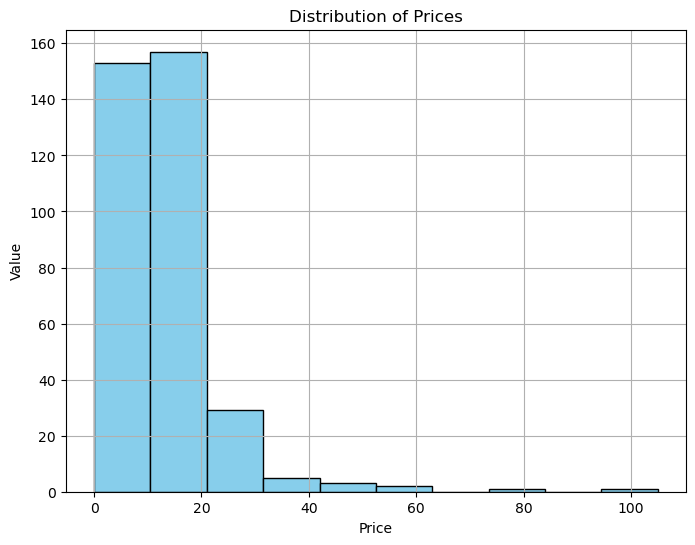

In [80]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
plt.figure(figsize=(8, 6))
df['price'].plot(kind='hist', color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [30]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())


105
0
13.076923076923077
12.0


#### Максимальна ціна?
Відповідь: 105
#### Мінімальна ціна?
Відповідь: 0
#### Середня ціна?
Відповідь: 13.076923076923077
#### Медіанна ціна?
Відповідь: 12.0

# Search and sort data

In [38]:
max_rating = df['user_rating'].max()
print(max_rating)

4.9


#### Який рейтинг у датасеті найвищий? 
Відповідь: 4.9

In [39]:
books_max_rating = (df['user_rating'] == max_rating).sum()
print(books_max_rating)

28


#### Скільки книг мають такий рейтинг? 
Відповідь: 28

In [40]:
max_reviews = df['reviews'].idxmax()
book_rev = df.loc[max_reviews, 'name']
print(book_rev)

Where the Crawdads Sing


#### Яка книга має найбільше відгуків? 
Відповідь: Where the Crawdads Sing

In [47]:
top_2015 = df[df['year'] == 2015]
max_price = top_2015['price'].idxmax()
book_expensive = top_2015.loc[max_price, 'name']
book_expensive


'Go Set a Watchman: A Novel'

#### З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
Відповідь:  'Go Set a Watchman: A Novel'

In [53]:
fiction_2010= df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
num_fiction_2010 = fiction_2010.shape[0]
print(num_fiction_2010)

17


#### Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
Відповідь: 17

In [57]:
books_2010_2011 = df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)]
books_2010_2011.shape[0]

1

#### Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
Відповідь: 1

In [65]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
top_2015_8_dollars = df[(df['year'] == 2015) & (df['price'] < 8)]
sort_top_2015_8_dollars = top_2015_8_dollars.sort_values('price')
sort_top_2015_8_dollars['name'].iloc[-1]

'Old School (Diary of a Wimpy Kid #10)'

#### Яка книга остання у відсортованому списку? 
Відповідь: Old School (Diary of a Wimpy Kid #10)	

# Aggregation of data and connection of tables

In [66]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
genre_price_stats = df.groupby('genre').agg({'price': ['min', 'max']})
print(genre_price_stats)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


#### Максимальна ціна для жанру Fiction
Відповідь: 82

#### Мінімальна ціна для жанру Fiction 
Відповідь: 0

#### Максимальна ціна для жанру Non Fiction 
Відповідь: 105

#### Мінімальна ціна для жанру Non Fiction 
Відповідь: 0

In [69]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
authors_count_books = df.groupby('author').agg({'name': 'count'})
authors_count_books = authors_count_books.sort_values('name')
print(authors_count_books)

                     name
author                   
Abraham Verghese        1
M Prefontaine           1
Madeleine L'Engle       1
Margaret Atwood         1
Margaret Wise Brown     1
...                   ...
Bill O'Reilly           6
Dav Pilkey              6
Stephenie Meyer         7
Rick Riordan           10
Jeff Kinney            12

[248 rows x 1 columns]


#### Якої розмірності вийшла таблиця? 
Відповідь: 248 rows

#### Який автор має найбільше книг? 
Відповідь: Jeff Kinney

#### Скільки книг цього автора? 
Відповідь: 12

In [71]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
authors_mean_rating = df.groupby('author').agg({'user_rating': 'mean'})
authors_mean_rating = authors_mean_rating.sort_values('user_rating')
print(authors_mean_rating)

                      user_rating
author                           
Donna Tartt                   3.9
Muriel Barbery                4.0
Gillian Flynn                 4.0
Gallup                        4.0
Ian K. Smith M.D.             4.1
...                           ...
Sherri Duskey Rinker          4.9
Bill Martin Jr.               4.9
Dav Pilkey                    4.9
Patrick Thorpe                4.9
Jill Twiss                    4.9

[248 rows x 1 columns]


#### У якого автора середній рейтинг мінімальний? 
Відповідь: Donna Tartt

#### Який у цього автора середній рейтинг? 
Відповідь: 3.9

In [73]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
authors_books_rating = pd.concat([authors_count_books, authors_mean_rating], axis=1)
authors_books_rating = authors_books_rating.sort_values(['name', 'user_rating'])
authors_books_rating

,name,user_rating
author,,
Donna Tartt,1,3.900000
Muriel Barbery,1,4.000000
Gillian Flynn,1,4.000000
Gallup,1,4.000000
Paula Hawkins,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


#### Який автор перший у списку?
Відповідь: Donna Tartt

# Visualization


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


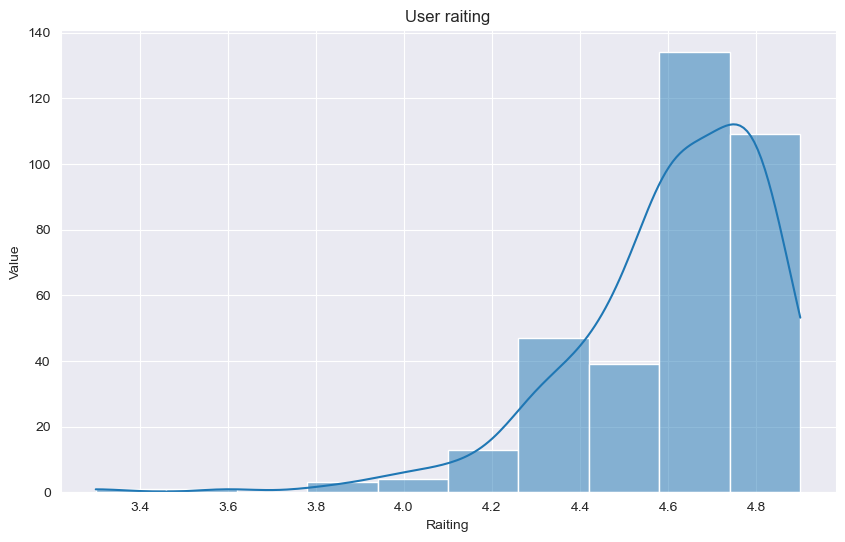

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user_rating'], bins=10, kde=True)
plt.title('User raiting')
plt.xlabel('Raiting')
plt.ylabel('Value')
plt.show()

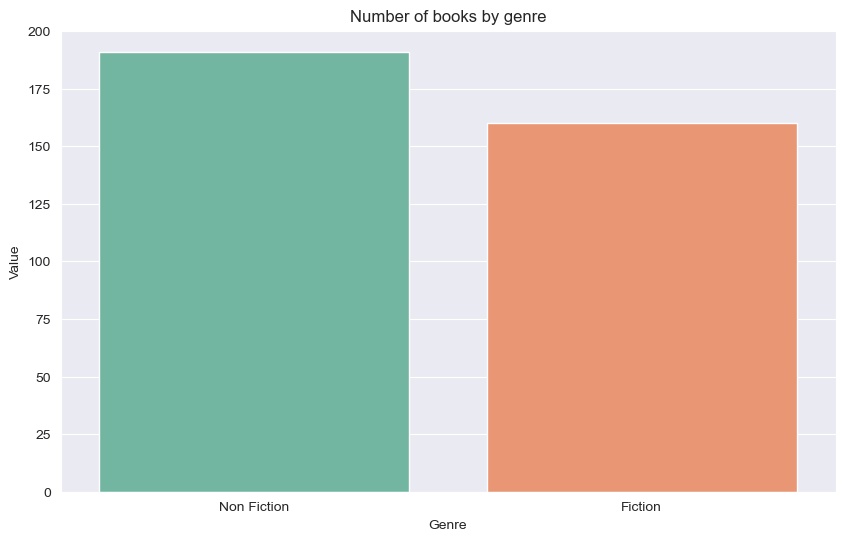

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre', palette='Set2')
plt.title('Number of books by genre')
plt.xlabel('Genre')
plt.ylabel('Value')
plt.show()

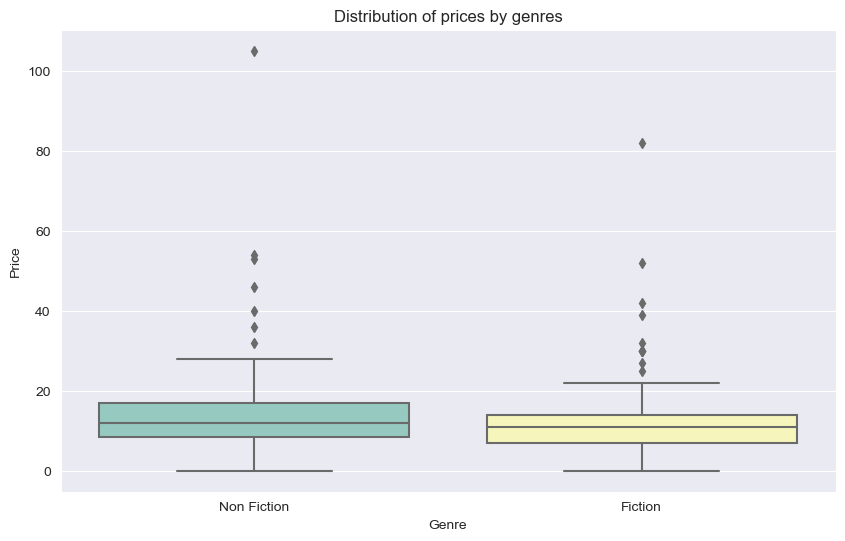

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='genre', y='price', palette='Set3')
plt.title('Distribution of prices by genres')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()

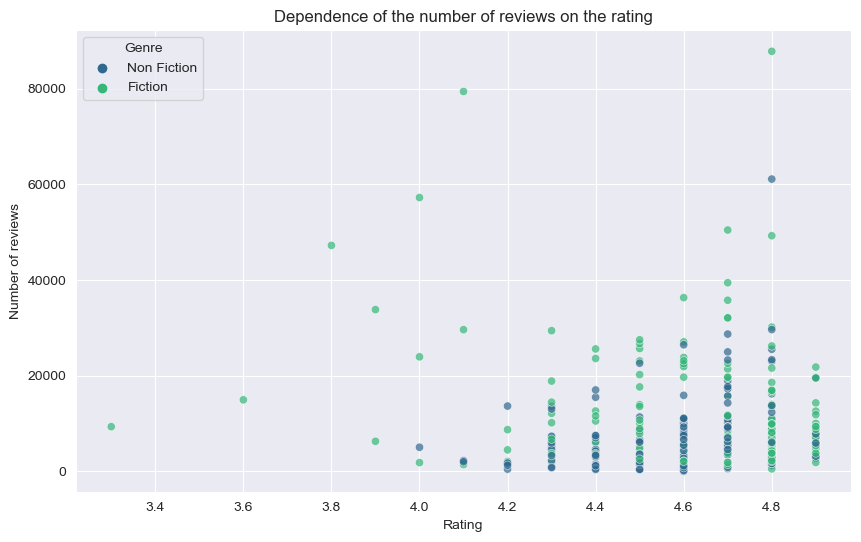

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='user_rating', y='reviews', hue='genre', palette='viridis', alpha=0.7)
plt.title('Dependence of the number of reviews on the rating')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.legend(title='Genre')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


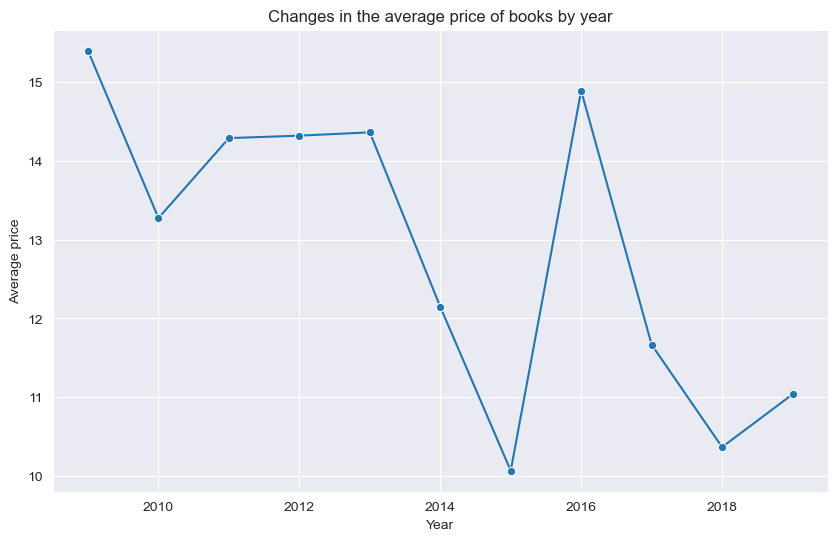

In [90]:
plt.figure(figsize=(10, 6))
mean_price_by_year = df.groupby('year')['price'].mean().reset_index()
sns.lineplot(data=mean_price_by_year, x='year', y='price', marker='o')
plt.title('Changes in the average price of books by year')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.show()